## Air Quality UCI Dataset Overview\n",
"The Air Quality UCI dataset contains measurements of air quality variables collected in an Italian city. The data includes various chemical sensor readings, meteorological data, and temporal features.\n",
### Variables Description\n",
  1. **CO(GT)**: True hourly averaged concentration of CO in mg/m³ (**target variable**)\n",
  2. **PT08.S1(CO)**: Sensor 1 (tin oxide) response related to CO\n",
  3. **NMHC(GT)**: True hourly averaged concentration of Non-Methane Hydrocarbons in µg/m³\n",
  4. **C6H6(GT)**: True hourly averaged concentration of Benzene in µg/m³\n",
  5. **PT08.S2(NMHC)**: Sensor 2 (titania) response related to NMHC\n",
  6. **NOx(GT)**: True hourly averaged concentration of Nitric Oxides in ppb\n",
  7. **PT08.S3(NOx)**: Sensor 3 (tungsten oxide) response related to NOx\n",
  8. **NO2(GT)**: True hourly averaged concentration of NO2 in µg/m³\n",
  9. **PT08.S4(NO2)**: Sensor 4 (tungsten oxide) response related to NO2\n",
  10. **PT08.S5(O3)**: Sensor 5 (indium oxide) response related to O3\n",
  11. **T**: Temperature in °C\n",
  12. **RH**: Relative Humidity (%)\n",
  13. **AH**: Absolute Humidity\n",
  14. **Year**: Year of measurement\n",
  15. **Month**: Month of measurement\n",
  16. **Day**: Day of measurement\n",
### Dataset Summary
  **Number of rows:** 9357
  <br>
  **Number of columns:** 16 (including the target variable)"
  <br>
  **Data types:** Mostly float64, with some int32/int64 for temporal features"
  <br>
  "This dataset is suitable for regression tasks, particularly for predicting air pollutant concentrations based on sensor and meteorological data."

In [25]:
# Importing LIbraries with regression algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline


### Dataset Import

In [4]:
# importing dataset
df = pd.read_excel('AirQualityUCI.xlsx')
df.head()

Date      Time  CO(GT)  ...      T         RH        AH
0 2004-03-10  18:00:00     2.6  ...  13.60  48.875001  0.757754
1 2004-03-10  19:00:00     2.0  ...  13.30  47.700000  0.725487
2 2004-03-10  20:00:00     2.2  ...  11.90  53.975000  0.750239
3 2004-03-10  21:00:00     2.2  ...  11.00  60.000000  0.786713
4 2004-03-10  22:00:00     1.6  ...  11.15  59.575001  0.788794

[5 rows x 15 columns]

## Data Wrangling

In [5]:
# Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [16]:
# checking null values
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [6]:
# checking duplicates
df.duplicated().sum()

np.int64(0)

In [7]:
# checking data types
df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                  int64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

In [8]:
# checking unique values in each column
df.nunique()

Date              391
Time               24
CO(GT)             97
PT08.S1(CO)      3246
NMHC(GT)          430
C6H6(GT)         3773
PT08.S2(NMHC)    3773
NOx(GT)          2467
PT08.S3(NOx)     3519
NO2(GT)          1420
PT08.S4(NO2)     4408
PT08.S5(O3)      4679
T                3368
RH               4903
AH               8988
dtype: int64

In [9]:
# removing the time column
df = df.drop(columns=['Time'], axis=1)

In [10]:
# splitting the Date column in year, month, and day of datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
df.drop(columns=['Date'], axis=1, inplace=True)

In [12]:
df.head()

CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  ...        AH  Year  Month  Day
0     2.6      1360.00       150  11.881723  ...  0.757754  2004      3   10
1     2.0      1292.25       112   9.397165  ...  0.725487  2004      3   10
2     2.2      1402.00        88   8.997817  ...  0.750239  2004      3   10
3     2.2      1375.50        80   9.228796  ...  0.786713  2004      3   10
4     1.6      1272.25        51   6.518224  ...  0.788794  2004      3   10

[5 rows x 16 columns]

## Exploratery Data Analysis

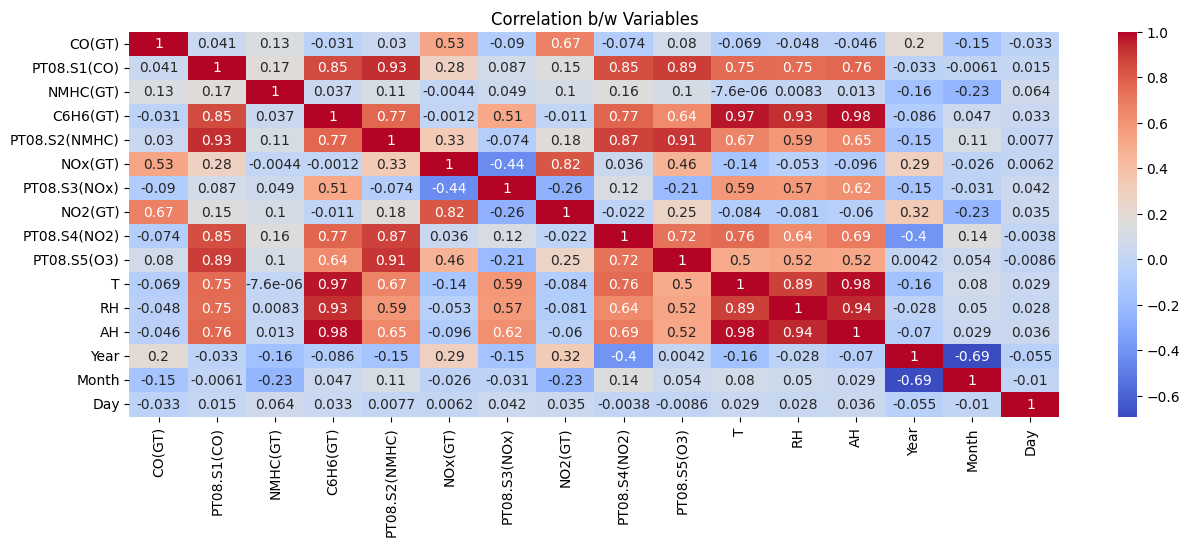

In [13]:
# plotting the correlation matrix
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation b/w Variables')
plt.show()

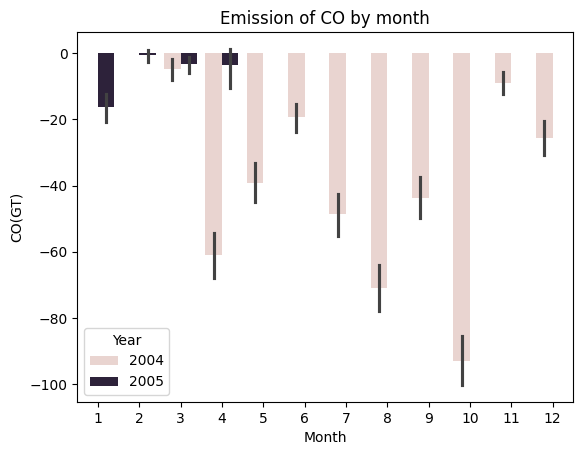

In [14]:
# plotting a barplot to show month vs co
sns.barplot(x="Month",y='CO(GT)', hue='Year',data=df)
plt.title('Emission of CO by month')
plt.xlabel('Month')
plt.ylabel('CO(GT)')
plt.show()

In [2]:
# # plotting a regression plot 
# for col in df.columns:
#     sns.regplot(x = 'CO(GT)', y = col, data=df)
#     plt.show()
#     print("<-------------------------------------------->")
#     print("<-------------------------------------------->")

array([[<Axes: title={'center': 'CO(GT)'}>,
        <Axes: title={'center': 'PT08.S1(CO)'}>,
        <Axes: title={'center': 'NMHC(GT)'}>,
        <Axes: title={'center': 'C6H6(GT)'}>],
       [<Axes: title={'center': 'PT08.S2(NMHC)'}>,
        <Axes: title={'center': 'NOx(GT)'}>,
        <Axes: title={'center': 'PT08.S3(NOx)'}>,
        <Axes: title={'center': 'NO2(GT)'}>],
       [<Axes: title={'center': 'PT08.S4(NO2)'}>,
        <Axes: title={'center': 'PT08.S5(O3)'}>,
        <Axes: title={'center': 'T'}>, <Axes: title={'center': 'RH'}>],
       [<Axes: title={'center': 'AH'}>, <Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Month'}>,
        <Axes: title={'center': 'Day'}>]], dtype=object)

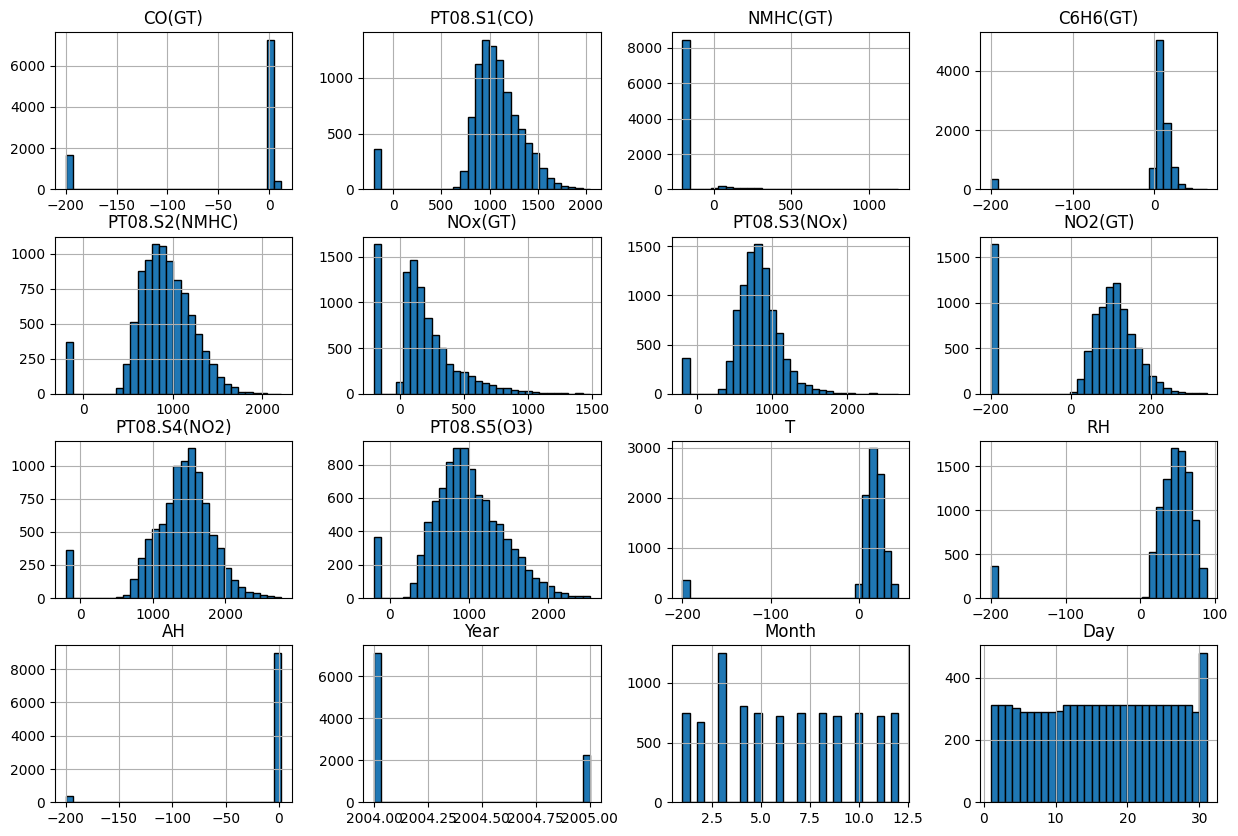

In [17]:
# plotting a histogram
df.hist(figsize=(15, 10), bins=30, edgecolor='black')

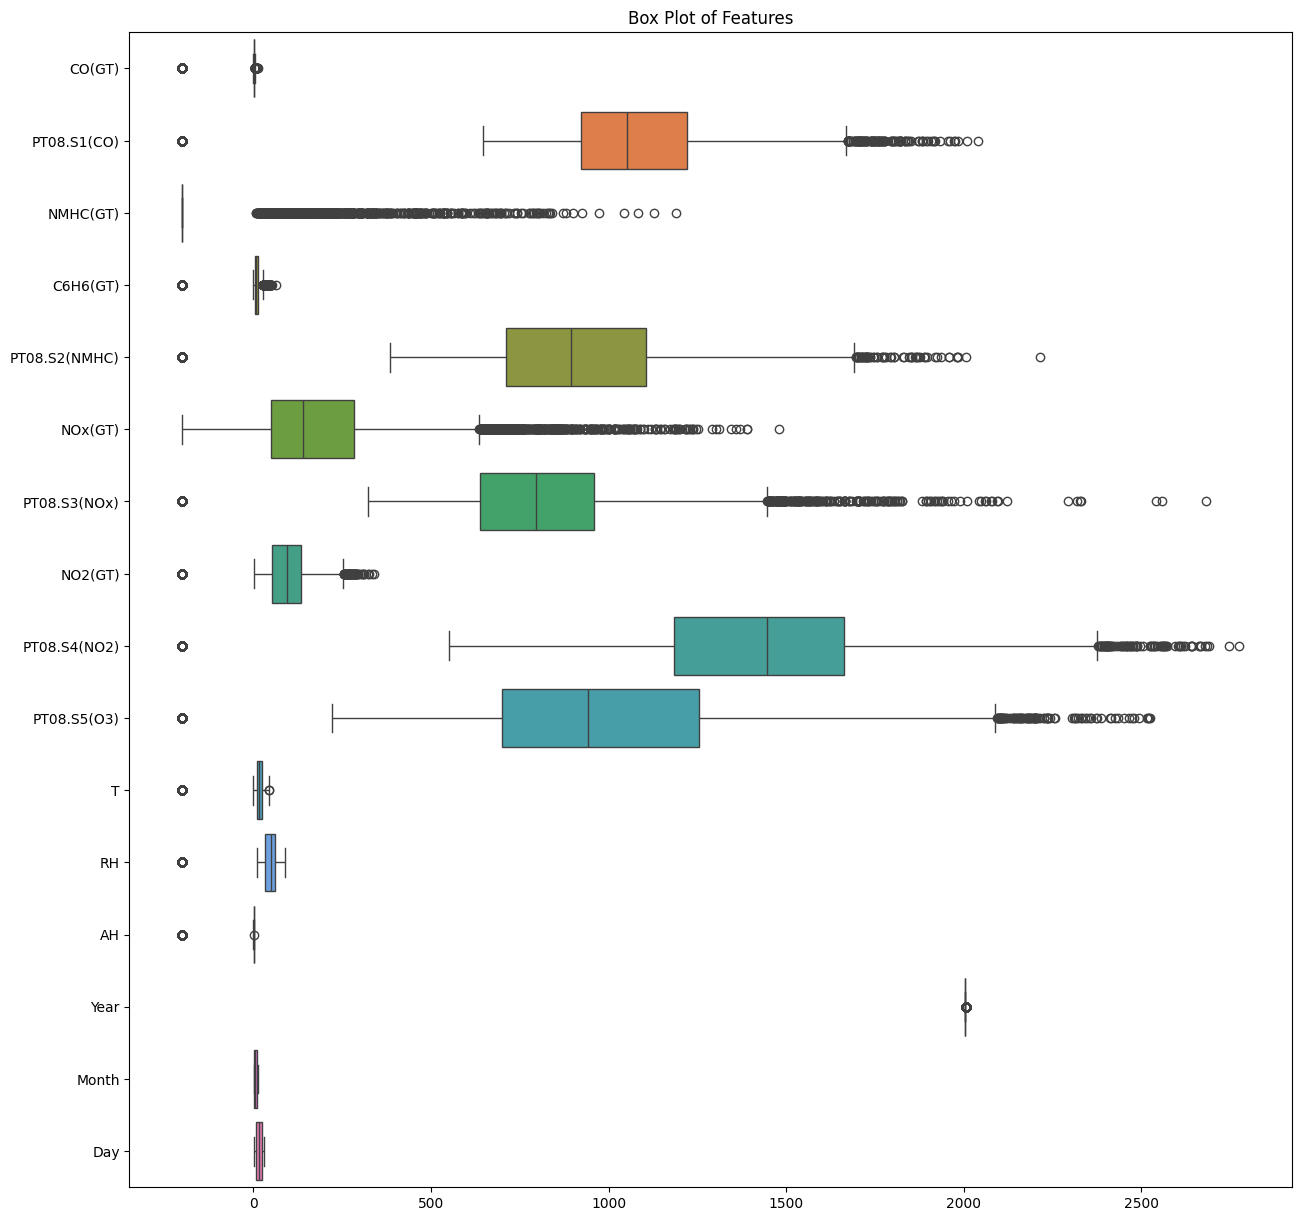

In [22]:
# plotting a box plot
plt.figure(figsize=(15, 15))
sns.boxplot(data=df, orient='h')
plt.title('Box Plot of Features')
plt.show()

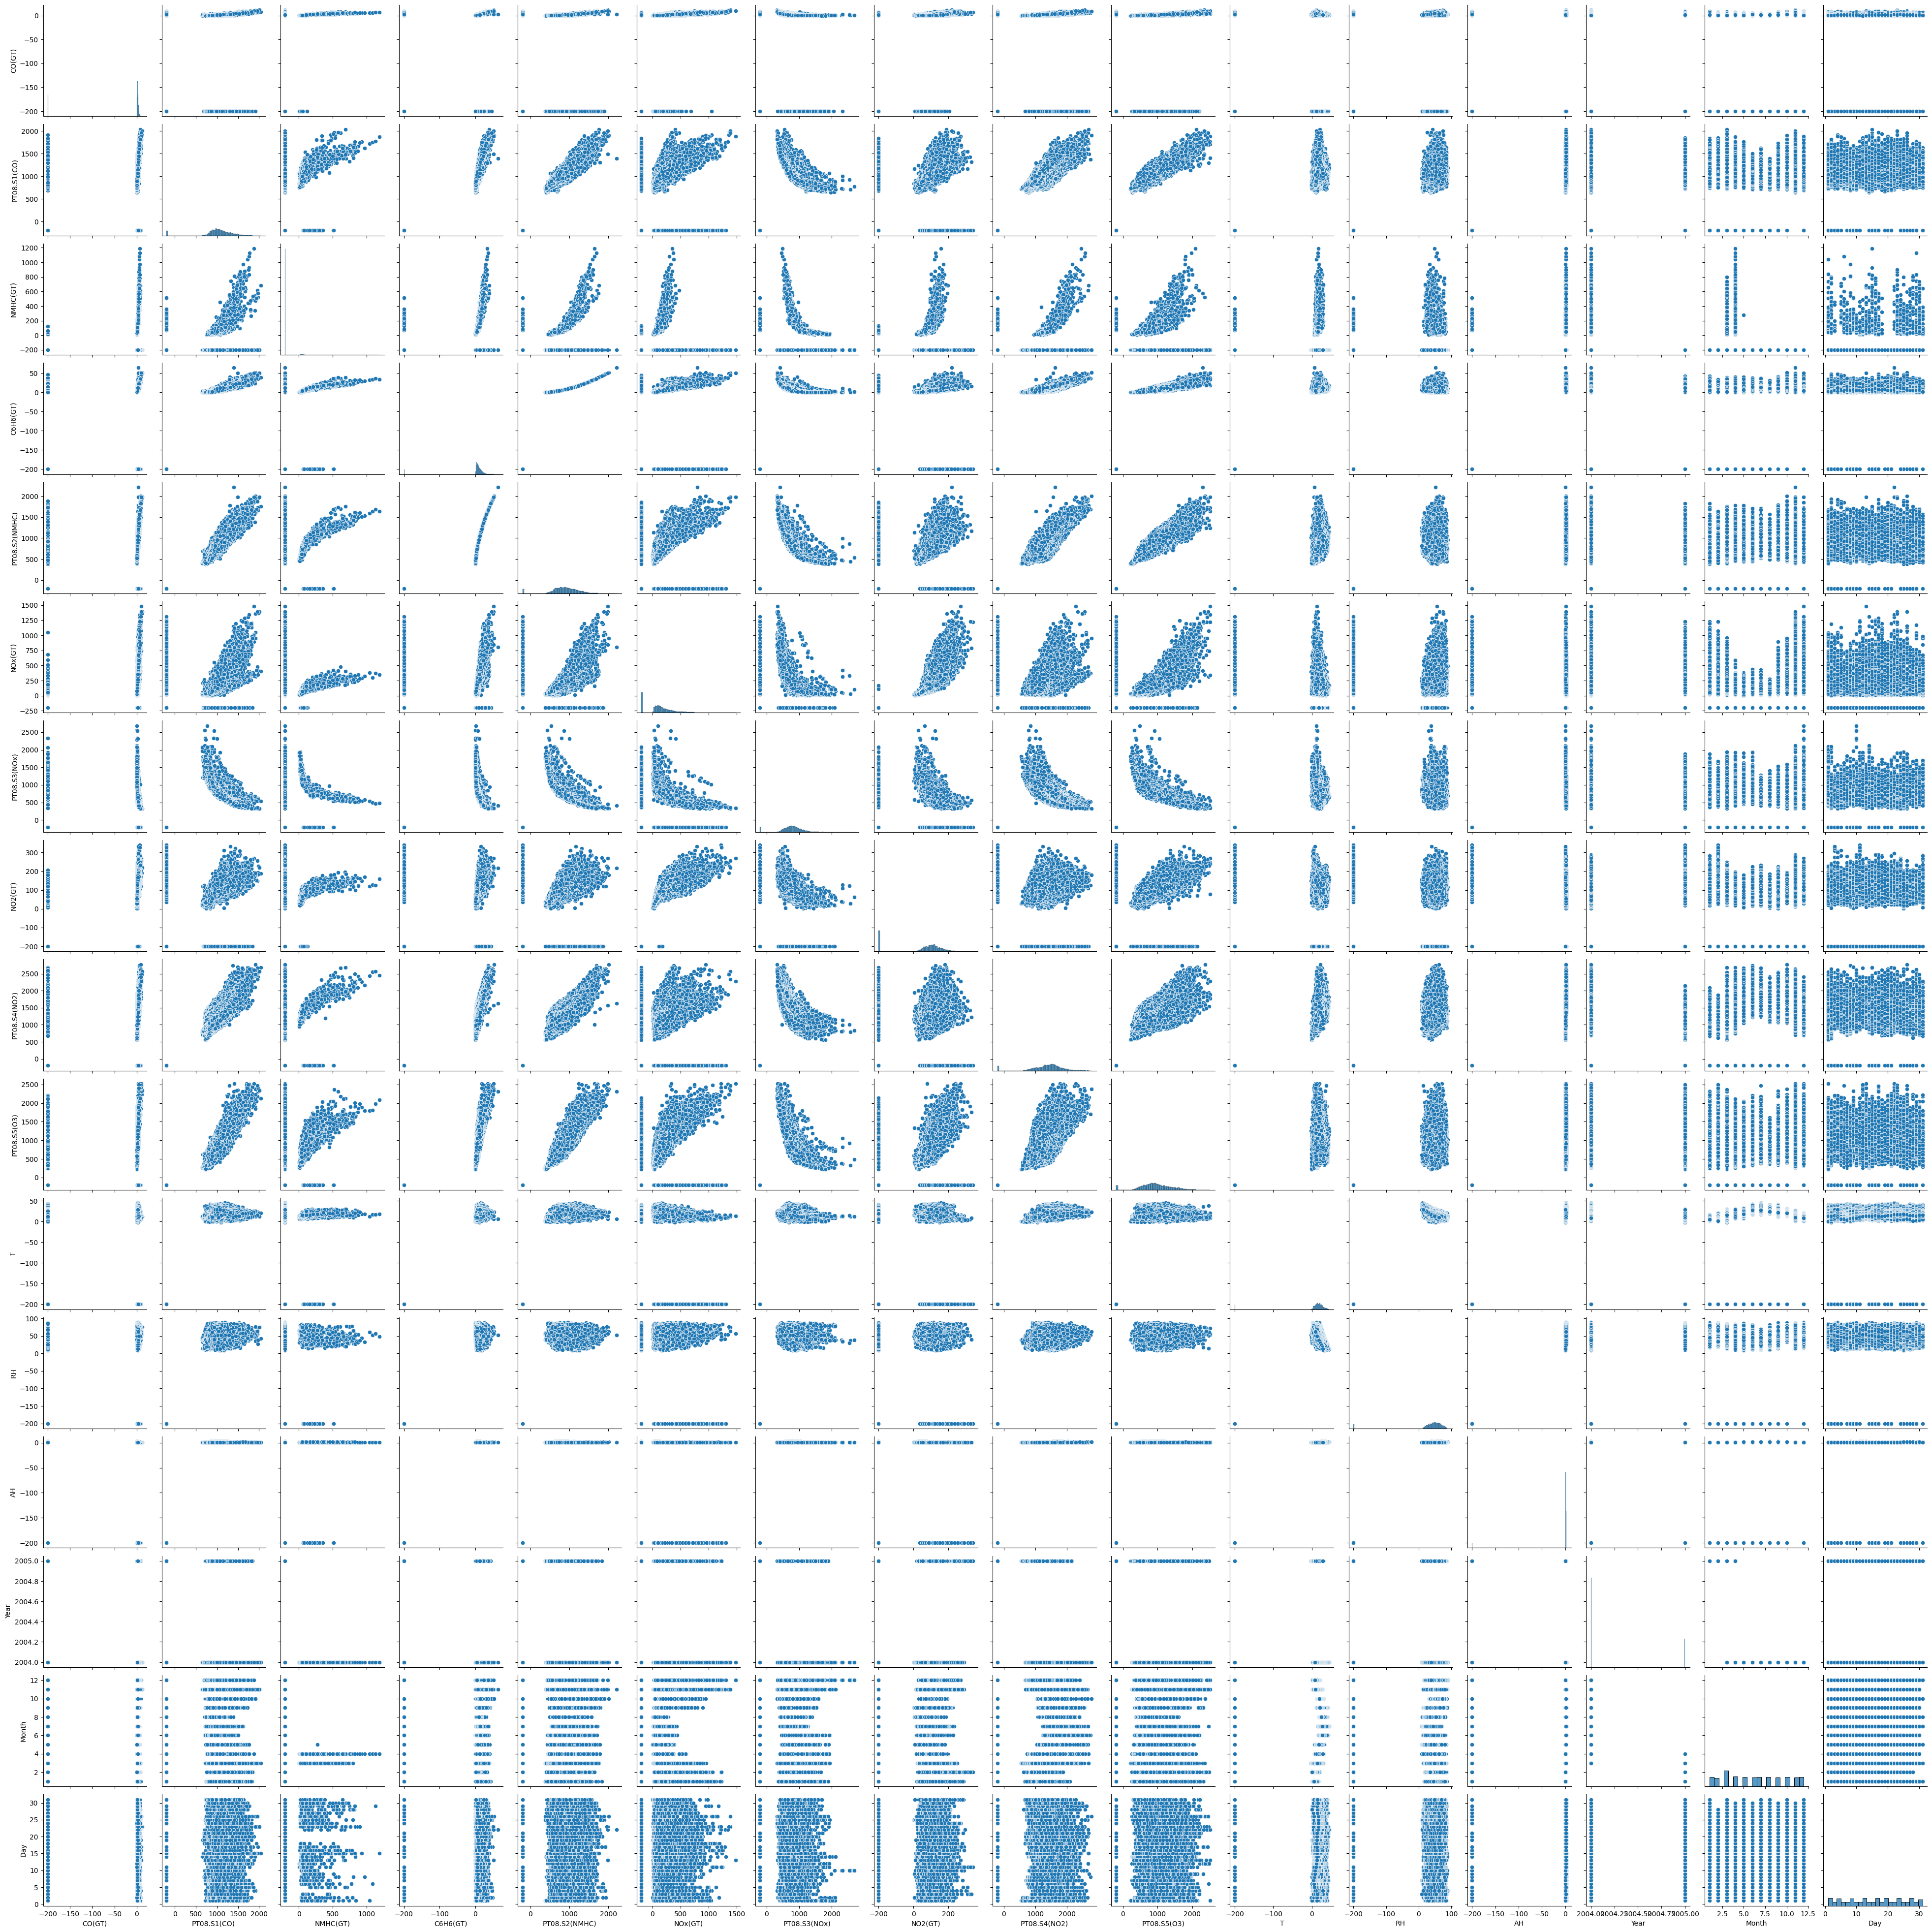

In [23]:
# plotting a pair plot
sns.pairplot(df)
plt.show()

### Data Processing

In [26]:
# Data Processing
# Standarizing the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [27]:
# Splitting the data into features and target variable
X = df_scaled.drop('CO(GT)', axis=1)
y = df_scaled['CO(GT)']

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Traning 

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Neural Network": MLPRegressor()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} - MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")
    print("<-------------------------------------------->")

Linear Regression - MAE: 0.43230475749218794, MSE: 0.46894187002023996, R2: 0.5213849516910849
<-------------------------------------------->
Decision Tree - MAE: 0.15922208520262457, MSE: 0.40232136488041, R2: 0.5893796826467316
<-------------------------------------------->
Random Forest - MAE: 0.20642150755831018, MSE: 0.23436126487792722, R2: 0.7608044082170649
<-------------------------------------------->
Support Vector Machine - MAE: 0.23051403246390118, MSE: 0.42391147838322163, R2: 0.5673442154006587
<-------------------------------------------->
K-Nearest Neighbors - MAE: 0.1827819223904556, MSE: 0.2560971595201554, R2: 0.7386201527062943
<-------------------------------------------->
Neural Network - MAE: 0.32297824163661903, MSE: 0.31932083892000446, R2: 0.6740923160920886
<-------------------------------------------->


/home/muhammad-aftab/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
!pip install xgboost

In [34]:
# Using XGBOOST 
from xgboost import XGBRegressor
xgboost_model = XGBRegressor()
xgboost_model.fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
print(f"XGBoost - MAE: {mean_absolute_error(y_test, y_pred)}, MSE: {mean_squared_error(y_test, y_pred)}, R2: {r2_score(y_test, y_pred)}")
print("<-------------------------------------------->")

XGBoost - MAE: 0.21985950760984763, MSE: 0.23680893846352277, R2: 0.7583062448277225
<-------------------------------------------->


In [35]:
# comparing the performance of all models using DataFrame
results = {
    "Model": [],
    "MAE": [],
    "MSE": [],
    "R2": []
}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results["Model"].append(name)
    results["MAE"].append(mean_absolute_error(y_test, y_pred))
    results["MSE"].append(mean_squared_error(y_test, y_pred))
    results["R2"].append(r2_score(y_test, y_pred))
results_df = pd.DataFrame(results)
print(results_df)
print("<-------------------------------------------->")

/home/muhammad-aftab/myenv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                    Model       MAE       MSE        R2
0       Linear Regression  0.432305  0.468942  0.521385
1           Decision Tree  0.153598  0.388074  0.603921
2           Random Forest  0.203053  0.227681  0.767623
3  Support Vector Machine  0.230514  0.423911  0.567344
4     K-Nearest Neighbors  0.182782  0.256097  0.738620
5          Neural Network  0.324131  0.312473  0.681082
<-------------------------------------------->
